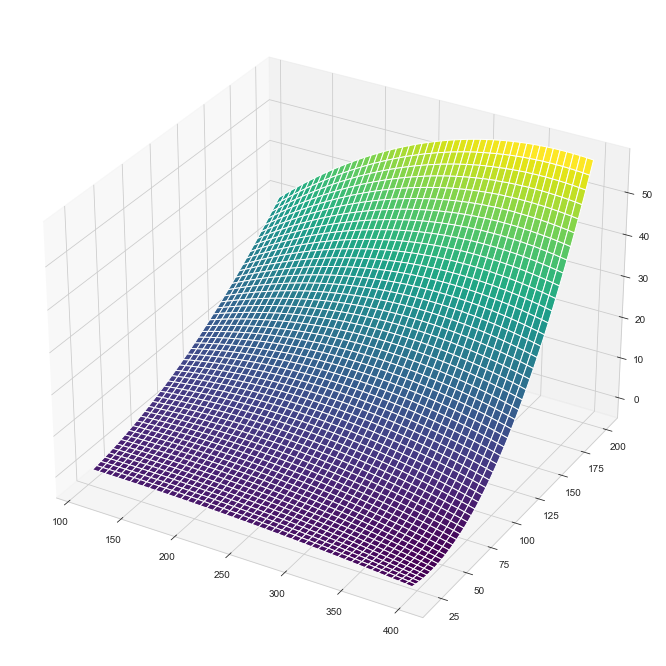

In [24]:
%matplotlib inline
#%matplotlib notebook

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#create 3d axes
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')

#popt3_calc = [(0.003276728)*1.8684/100, (-0.008181688)*1.8684/100, 0.004813692*3.4909/100, (-3.33334E-05)*3.4909/100]

#popt3_calc = [(0.00330521)*1.8684/100, (-0.008263927)*1.8684/100, 0.004800243*3.4909/100, (1.27583E-05)*3.4909/100]
popt3_calc = [(0.003324414)*1.8684/100, (-0.008283802)*1.8684/100, 0.004753949*3.4909/100, (8.32619E-05)*3.4909/100]
#popt3_calc = [(0.004006934)*1.8684/100, (-0.013664336)*1.8684/100, 0.001826794*3.4909/100, (0.008175905)*3.4909/100]
#popt3_calc = [110*0.25/1391684.0, 112*0.25/854199.0, 112*0.25/973357.0, 112*0.25/586476.0]

K_ES_APP = 100.0*60.0*60.0/(100000.0/1.75)
K_ES_2_APP = 100.0*60.0*60.0/(10000000.0*2.56)
K_ES_APP_2 = 100.0*60.0*60.0/(10000000.0)
K_ES_2_APP_2 = 100.0*60.0*60.0/(100000000.0*45.5)
k_mic = [K_ES_APP, K_ES_2_APP, K_ES_APP_2, K_ES_2_APP_2]

#function for Z values
def fun_consum(n, app):
    return popt3_calc[0]*k_mic[0]*n*app + popt3_calc[1]*k_mic[1]*n*n*app + popt3_calc[2]*k_mic[2]*n*app*app + popt3_calc[3]*k_mic[3]*n*n*app*app

# x and y values
n = np.linspace(110, 400, 50)
app = np.linspace(20, 200, 50)

X, Y = np.meshgrid(n, app)
Z = fun_consum(X, Y)

ax = plt.axes(projection ='3d')
#ax.plot_wireframe(X, Y, Z, color ='red')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis')
#ax.view_init(60, 60)
plt.show()

inst_cons_1d = []
inst_cons_2d = []

for i in range(110, 400, 1):
    for j in range(20, 200, 1):
        inst_cons_1d.append(fun_consum(i, j))
    inst_cons_2d.append(inst_cons_1d)
    inst_cons_1d = []

df = pd.DataFrame(inst_cons_2d)#, columns=['n', 'app', 'inst_cons']
df.to_csv('out.csv', index=False)
df.to_excel('out.xlsx')
#print(inst_cons)
